In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
#Download dataset
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

341


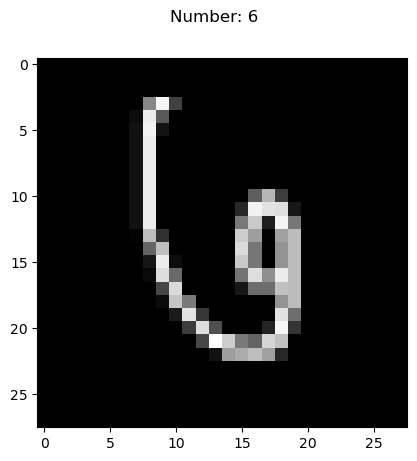

In [5]:
img_num = np.random.randint(0, X_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset
print(img_num)
plt.imshow(X_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

In [6]:
#Label for an example
y_test[3707]

8

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
#Label for an example
y_test[2805]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [42]:
### version -1 ###
clear_session()

#Initialize Sequential model
model = Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(BatchNormalization())

#Add 1st hidden layer
model.add(Dense(200))
model.add(LeakyReLU())

#Add 2nd hidden layer
model.add(Dense(100))
model.add(LeakyReLU())

#Add 3rd hidden layer
model.add(Dense(60))
model.add(LeakyReLU())

#Add 4th hidden layer
model.add(Dense(30))
model.add(LeakyReLU())

#Add OUTPUT layer
model.add(Dense(10, activation='softmax'))

In [43]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
#Review model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                        

In the context of machine learning, both model checkpoints and callbacks are tools used to improve the training process of neural networks, particularly in deep learning frameworks like TensorFlow and PyTorch. However, they serve different purposes:

Model Checkpoint:

A model checkpoint is a feature used to save the model's current weights or entire state at certain intervals during training.
The primary purpose of a model checkpoint is to save the model's progress periodically so that it can be restored or used later for inference or further training.
Model checkpoints are typically used to save the best-performing model based on a specified metric, such as validation accuracy or loss. This ensures that you retain the best version of the model throughout the training process.
Checkpoints are especially useful for long training processes where interruptions or failures may occur, allowing you to resume training from the last saved checkpoint rather than starting from scratch.
Callback:

A callback is a function or set of functions that are executed at specific points during the training process, such as at the beginning or end of an epoch or after a batch of data is processed.
Callbacks are more versatile and can perform various tasks during training, such as logging training metrics, adjusting learning rates dynamically, implementing early stopping, or saving model checkpoints.
While model checkpoints are a specific type of callback used for saving model weights, callbacks can perform a wide range of additional functions to customize the training process according to your specific needs.
Callbacks can be defined by the user or provided by the deep learning framework as pre-defined functions. Users can also create custom callbacks to implement specific behaviors not covered by built-in callbacks.
In summary, a model checkpoint is a type of callback used specifically for saving model weights or state during training, while callbacks encompass a broader range of functions that can be executed at various stages of the training process to customize and enhance the training procedure.

In [46]:
# ModelCheckpoint callback to save the best model based on validation accuracy
model_checkpoint = ModelCheckpoint(
    'mnist_leaky_relu_v1.h5',  # File path to save the model
    save_best_only=True,       # Save only the best model based on monitored metric
    monitor='val_accuracy',    # Metric to monitor for determining the best model
    mode='max',                # Mode for determining the best model ('max' or 'min')
    verbose=1                  # Verbosity mode (0 or 1)
)

# EarlyStopping callback to stop training when the monitored metric stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',        # Metric to monitor for early stopping
    patience=5,                # Number of epochs with no improvement after which training will be stopped
    verbose=1,                 # Verbosity mode (0 or 1)
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

Using both callbacks allows you to save the best model based on a monitored metric while also stopping the training process if the model's performance on a validation set stops improving, thereby preventing overfitting. This combination can help you find the best-performing model while avoiding unnecessary training epochs. It's a recommended practice for many training scenarios.

In [48]:
model.fit(X_train,y_train,          
          validation_data=(X_test, y_test),
          epochs=2,
          batch_size=32, 
          callbacks=[model_checkpoint, early_stopping])

Epoch 1/2
1875/1875 [==============================] - ETA: 0s - loss: 0.1380 - accuracy: 0.9573
Epoch 1: val_accuracy improved from 0.94880 to 0.95420, saving model to mnist_leaky_relu_v1.h5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1380 - accuracy: 0.9573 - val_loss: 0.5217 - val_accuracy: 0.9542
Epoch 2/2
1874/1875 [============================>.] - ETA: 0s - loss: 0.1189 - accuracy: 0.9631
Epoch 2: val_accuracy improved from 0.95420 to 0.95600, saving model to mnist_leaky_relu_v1.h5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1189 - accuracy: 0.9631 - val_loss: 0.4257 - val_accuracy: 0.9560


In [49]:
model.save('mnist_leaky_relu_sequential_1a_v1.h5')